# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


data = pd.read_csv(r'C:\Users\Francesco M\Documents\IronHack Syllabus\Labs\Module 3\lab-imbalance\your-code\archive.zip', nrows=100000)
print(data.shape)
display(data.head(2))

(100000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [5]:
data['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

### What is the distribution of the outcome? 

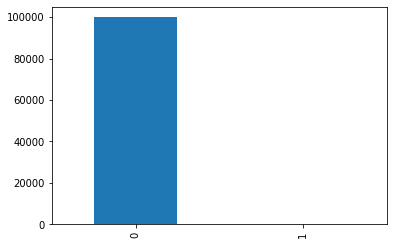

Outcome:
 0    99884
1      116
Name: isFraud, dtype: int64


In [6]:
# Your response here
# Your code here
count_class = data['isFraud'].value_counts()
count_class.plot(kind='bar')
plt.show()

print('Outcome:\n',count_class)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [7]:
print(data.dtypes)
display(data.head())

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
# Your code here

data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'], axis=1, inplace=True)
data = pd.get_dummies(data)
data.head(2)
X = data.drop('isFraud', axis=1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sm = SMOTE(random_state=1, sampling_strategy=1.0)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
X_train_SMOTE.shape

(149820, 10)

### Run a logisitc regression classifier and evaluate its accuracy.

In [9]:
# Your code here

lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_train_SMOTE, y_train_SMOTE)


print(lrc.score(X_test, y_test))
print(lrc.score(X_train_SMOTE, y_train_SMOTE))
print(lrc.score(X_train_SMOTE, y_train_SMOTE)<lrc.score(X_test, y_test))

0.9146
0.9366506474435989
False


### Now pick a model of your choice and evaluate its accuracy.

In [10]:
# Your code here

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train_SMOTE, y_train_SMOTE)

print(dtc.score(X_test, y_test))
print(dtc.score(X_train_SMOTE, y_train_SMOTE))
print(dtc.score(X_train_SMOTE, y_train_SMOTE)<dtc.score(X_test, y_test))

0.97944
0.9765251635295689
True


### Which model worked better and how do you know?

In [11]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.